In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx = 1.0
dt = 0.05*10
M = 1.0*0.1
K = 1.0
W = 1.0
mesh_x = 100
c = np.zeros(mesh_x)
# c[mesh_x//2:] = 1.0 # initializing half with composition 1

In [3]:
def initialize_cos(c):
    amplitude = 0.05
    c0 = 0.5
    lamda = mesh_x/4 # lambda in python is a built in feature, so we spell it lamda
    for x in range(mesh_x):
        c[x] = c0 + amplitude*np.cos(2*np.pi*x/lamda)
    return c

def initialize_random(c):
    amplitude = 0.05
    c0 = 0.50
    for x in range(mesh_x):
        random_no = np.random.random()
        c[x] = c0 + amplitude*random_no # random noise around c0
    
    # to make the average composition c0
    c_subtract = np.average(c-c0)
    c -= c_subtract
    return c

def free_energy(c):
    return W*c**2*(1.0-c)**2

def d_free_energy(c):
    return 2.0*W*c*(1.0-c)*(1.0-2*c)

def laplacian(c):
    laplacian = np.zeros(mesh_x)
    for i in range(1, mesh_x-1):
        laplacian[i] = (c[i+1] - 2.0*c[i] + c[i-1])/(dx**2)
    return laplacian

def impose_PBC(c):
#     2 buffer points at each boundary, 2 because we are using the 4th derivative in 
#     space (laplacian of laplacian), which requires the nearest and the 2nd nearest neighbour at either side.
# Here, imposing Periodic Boundary Conditions:
    c[0] = c[mesh_x-4]
    c[1] = c[mesh_x-3]
    c[mesh_x-2] = c[2]
    c[mesh_x-1] = c[3]
    return c

### Cahn Hilliard equation
For the functional
$$ I = \int \big(\frac{K}{2} (\nabla c)^2 + f(c) \big) dx $$
the evolution equation is
$$ \frac{\partial c}{\partial t} = \nabla\cdot(M\nabla \mu) = M\nabla^2\mu \quad(\text{when M is constant)},$$ 
where $\mu$ is,
$$\mu = \frac{\partial f}{\partial c} - K \nabla^2 c $$

Similar to the Allen-Cahn equation, $f(c)$ is the double well potential,
$$ f(c) = Wc^2(1-c)^2 $$
<br>
and $$ \frac{\partial f}{\partial c} = 2Wc(1-c)(1-2c) $$

### Periodic Boundary Condition
![Periodic Boundary Implementation](cahn_hilliard_pbc.png)

<IPython.core.display.Javascript object>


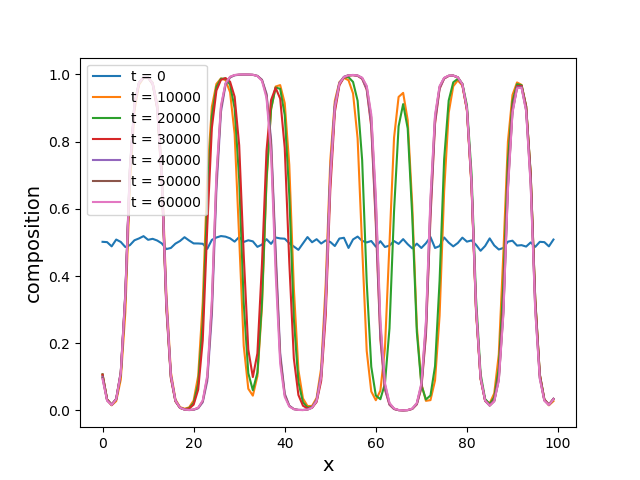

In [7]:
%matplotlib notebook
# c = initialize_cos(c)
c = initialize_random(c)
# print("average composition = ", np.average(c))
timesteps = 60001
t_every = 10000
mu = np.zeros(mesh_x)
for t in range(timesteps):
    mu = d_free_energy(c) - K*laplacian(c)
    dc_dt = M*laplacian(mu)
    c = c + dc_dt*dt
    c = impose_PBC(c)
    if t%t_every == 0:
        plt.plot(c, '-', label='t = ' + str(t)) # plotting only '*' markers

plt.xlabel('x', fontsize=14)
plt.ylabel('composition', fontsize=14)
plt.legend()
plt.show()